# HW1 (S.Mottahedi)

# Chapter 1

# Problem 1

## (a)

In [2]:
library(fda)
library(ggplot2)
library(tidyr)
library(dplyr)
library(fds)

options(repr.plot.width=10, repr.plot.height=8)

In [23]:
df <- data.frame(pinch)
names(df) <- 1:20

[1] "done"

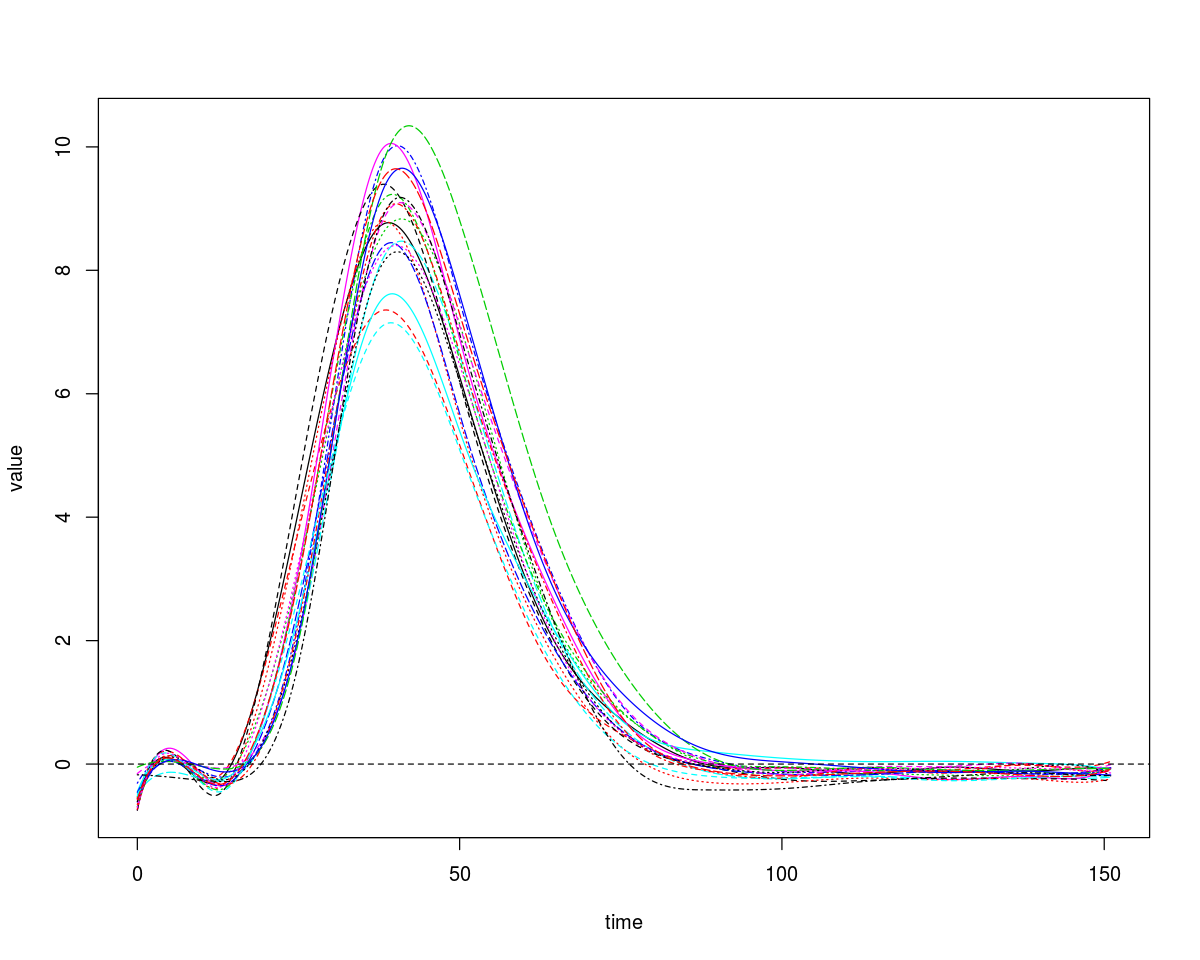

In [42]:
bs.basis <- create.bspline.basis(rangeval=c(0, 151), 
                                 nbasis=15, norder=4)
pinch.fd = smooth.basis(y=pinch, fdParobj=bs.basis)
# pinch.fd <- Data2fd(argvals=1:151, y=pinch, basisobj=bs.basis)
plot(pinch.fd)


## (b)

[1] "done"

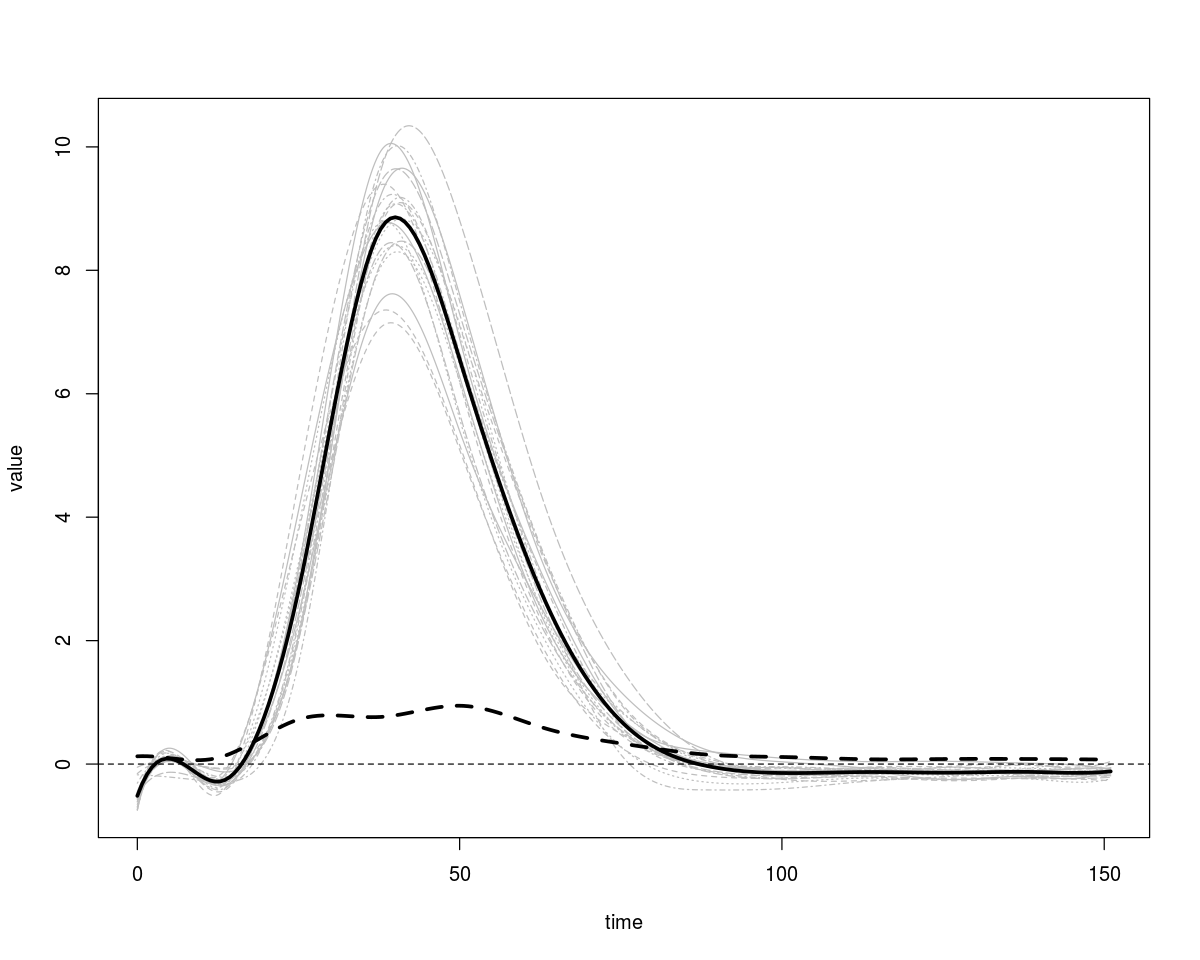

In [44]:
pinch.mean = mean(pinch.fd$fd)
pinch.sd = std.fd(pinch.fd$fd)
plot(pinch.fd, col='gray')
lines(pinch.mean, lwd=3)
lines(pinch.sd, lty=2, lwd=3)

## (c)

In [49]:
pinch.cov <- var.fd(pinch.fd$fd)
grid <- 0:151
cov.mat <- eval.bifd(grid, grid, pinch.cov)

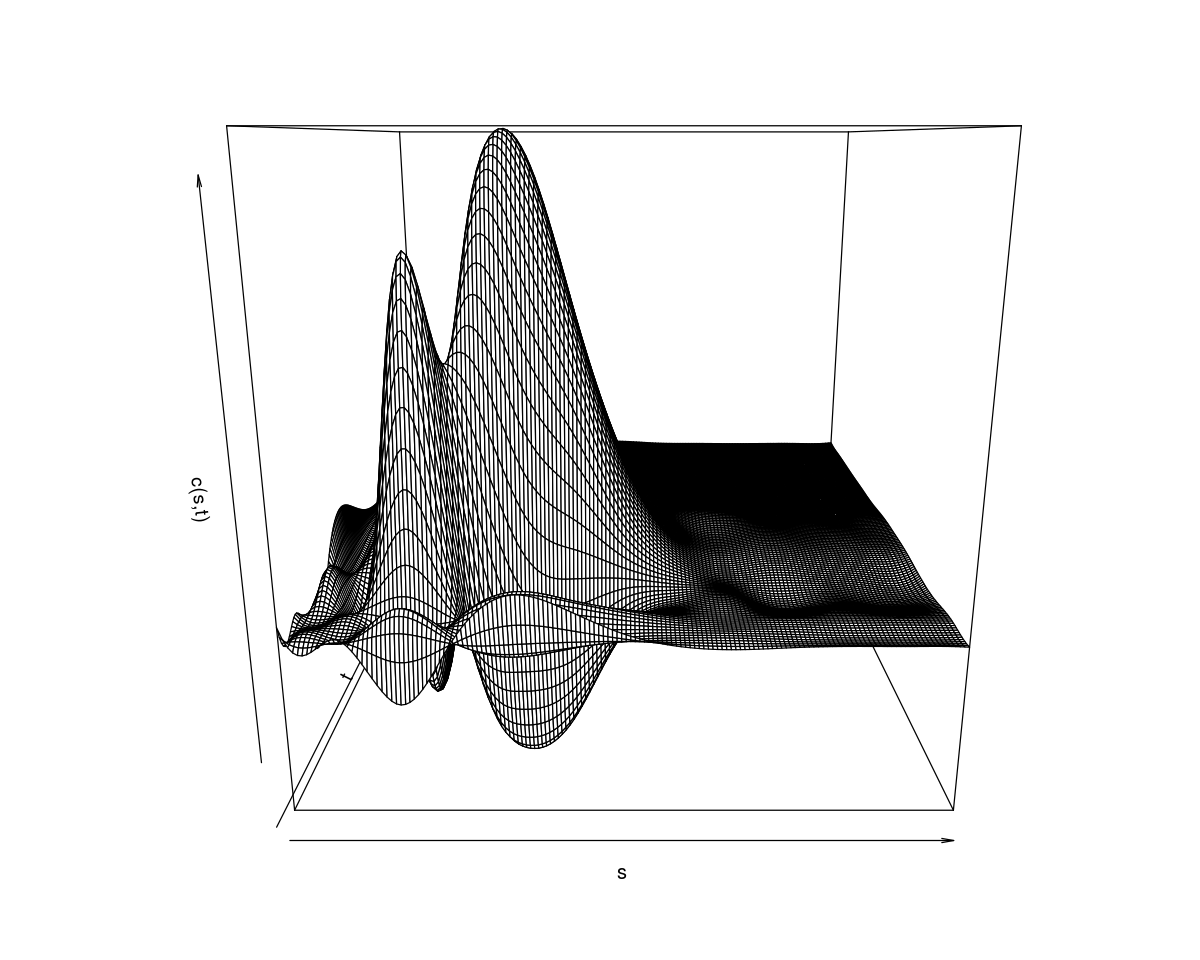

In [52]:
persp(grid, grid, cov.mat, 
      xlab='s', ylab='t', zlab='c(s,t)')

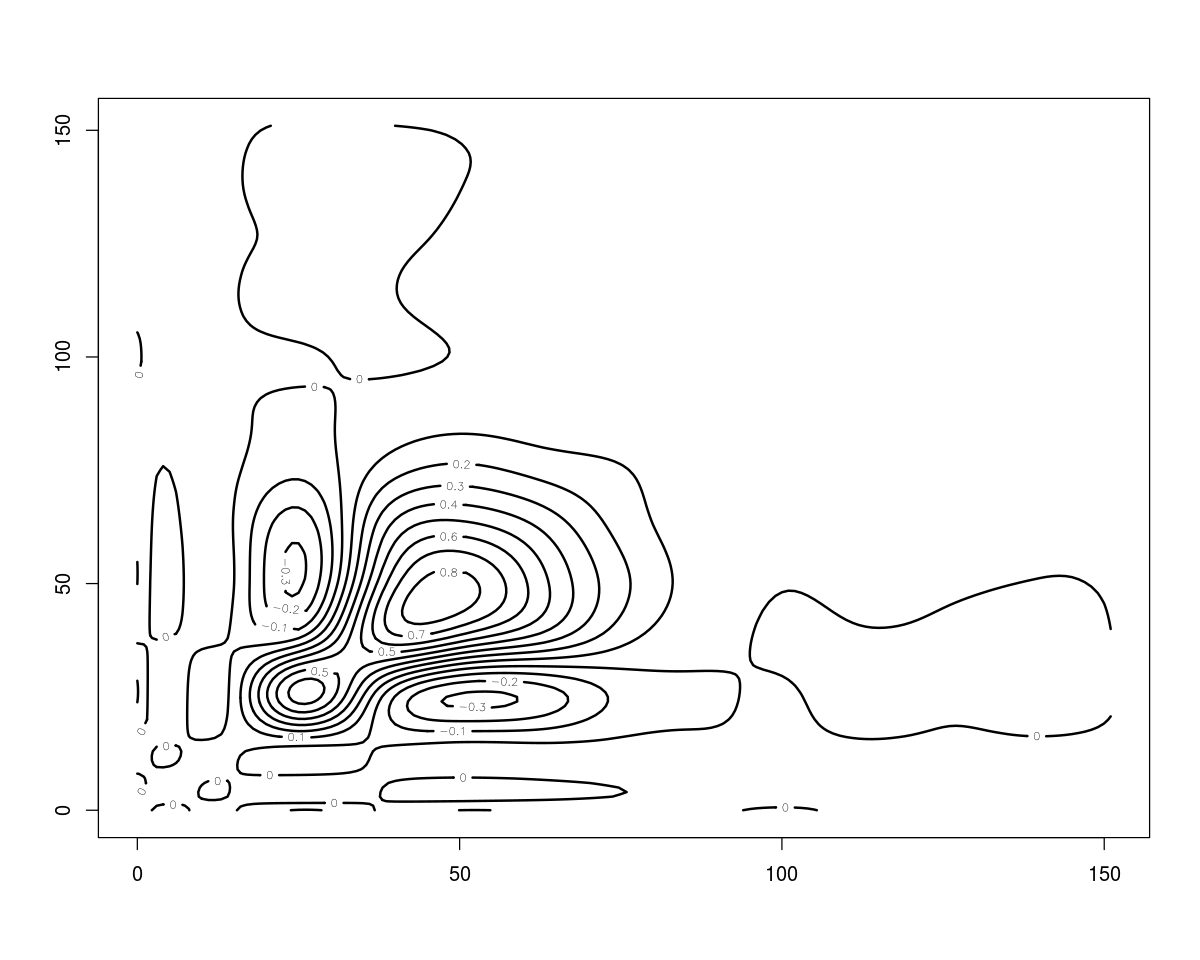

In [54]:
contour(grid, grid, cov.mat, lwd=2)

## (d)

[1] "done"

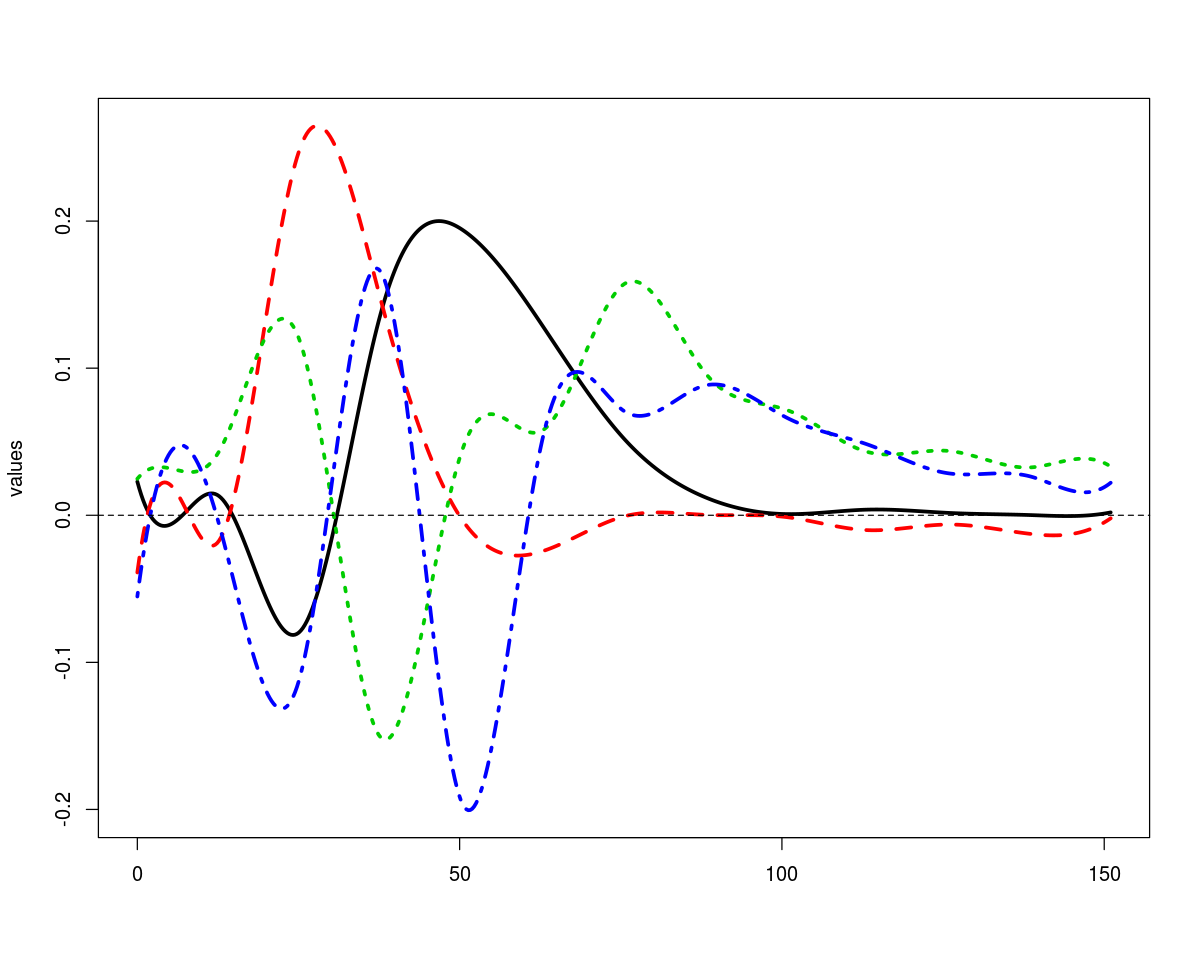

In [57]:
pinch.pca = pca.fd(pinch.fd$fd, nharm=4)
plot(pinch.pca$harmonics, lwd=3)

the first two EFPC can explain 92% of variability.

In [61]:
sum(pinch.pca$varprop[1:2])

[1] 0.9195624

# Problem 2

## (a)

In general Tereseries yield is higher in 1982 compared to 2009. The 2009 curve is a $Normal Yield Curve$ which has higher return for long term investments and lower return for short term investments. This kind of yield curve is a sign of expansionary economic policies. The 1982 yield curve is $Humped Yield Curve$, the highest rate of return is for 60 month investment rather than longer term maturities which is a sign of slowing economic growth.

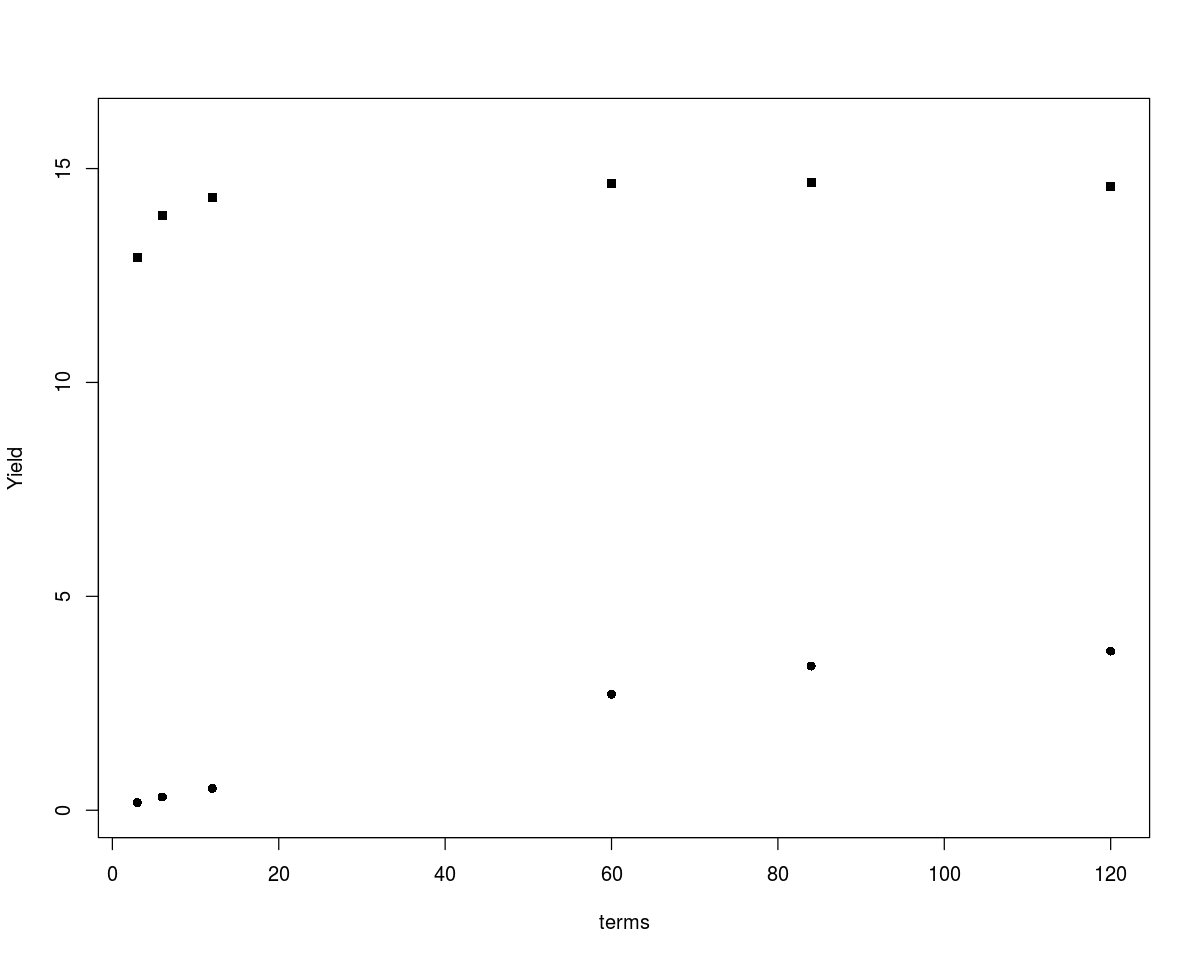

In [10]:
yield = FedYieldcurve; terms = yield$x
plot(terms, yield$y[,1], pch=15, ylab="Yield", ylim=c(0,16))
points(terms, yield$y[,330], pch=16)

## (b)

the average yield has a positive slope with lowest return for short and highest return for long term investments. 

[1] "done"

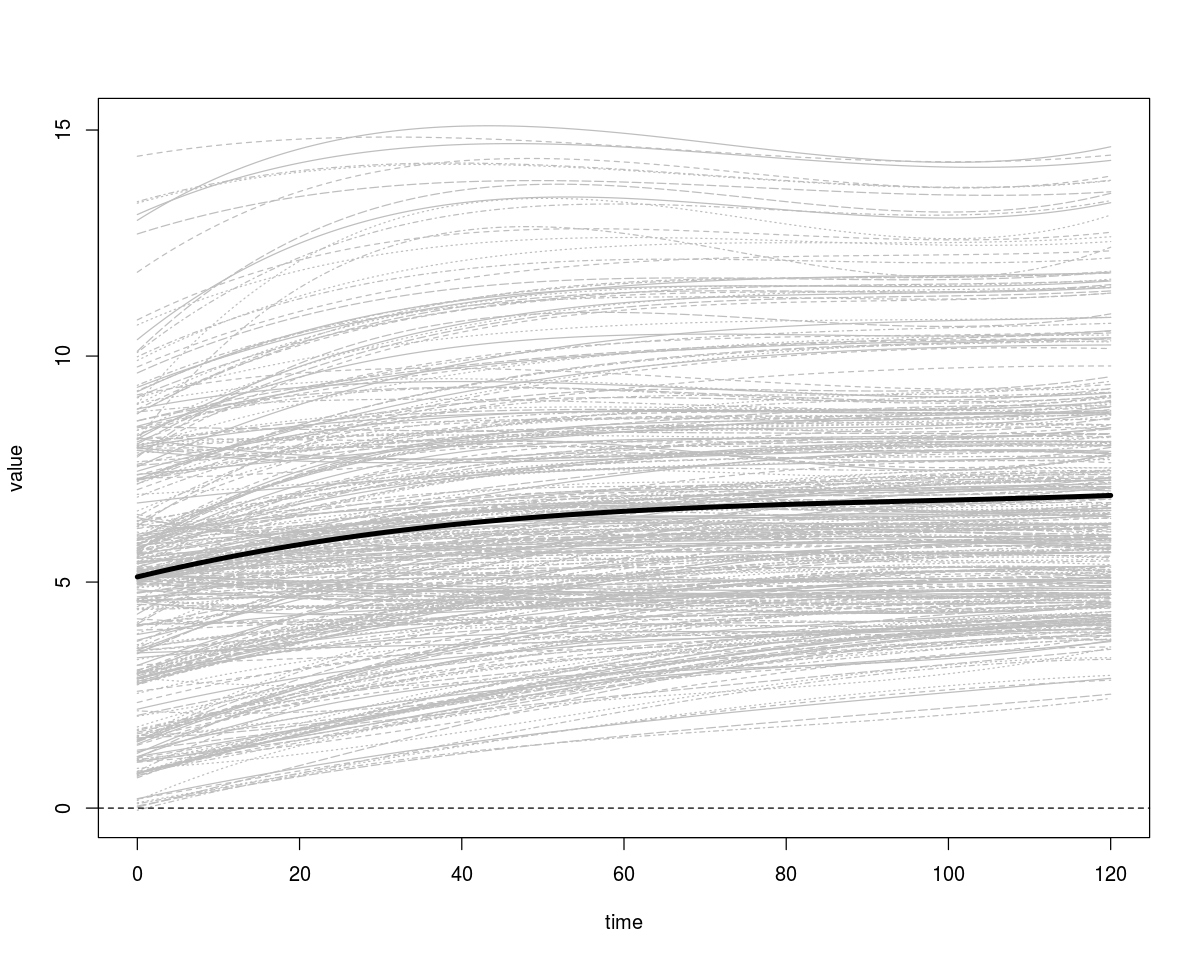

In [25]:
bs.basis <- create.bspline.basis(rangeval=c(0, 120), nbasis=4)
yield.fd = smooth.basis(y=yield$y, argvals=yield$x, fdParobj=bs.basis)

yield.mean = mean(yield.fd$fd)

plot(yield.fd, col='gray')
lines(yield.mean, lwd = 4)


## (c)

[1] "done"

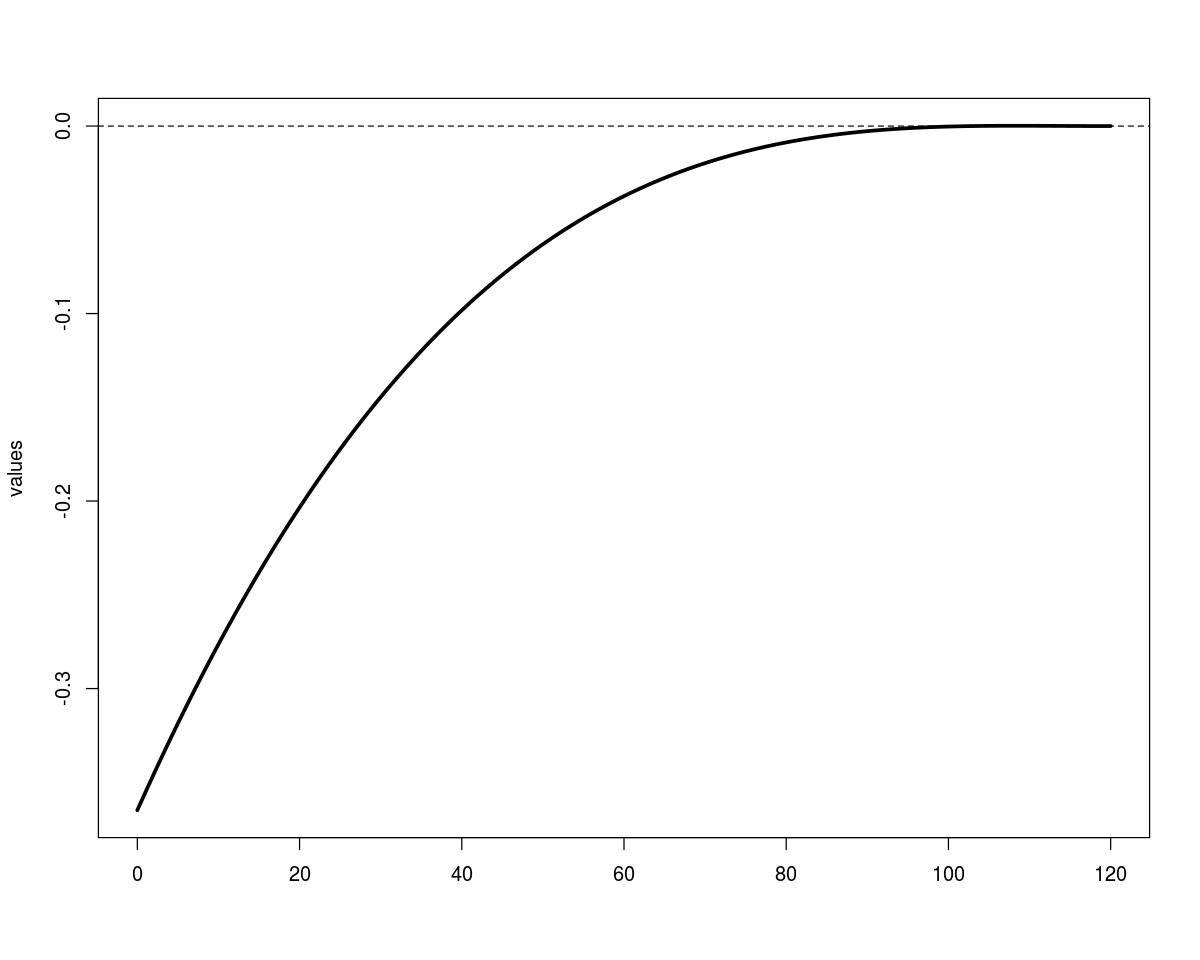

In [30]:
yield.pca = pca.fd(yield.fd$fd, nharm=1, centerfns=T)
plot(yield.pca$harmonics, lwd=3)

the first principle component explains 99.99% variability in the data. The first pricinple components shows that the yield increases with investment target maturity.

In [31]:
yield.pca$varprop

[1] 0.9999783

# Problem 6

$X_n(t) = \sum_m c_{nm}B_m(t)$

## (a) $\bar{x}_{N(t)}(t) = \sum_{m=1}^{M} a_m B_m(t)$

$\bar{x}(t) := \frac{1}{N} \sum_{n=1}^{N} X_n(t)$

$\bar{x}(t) = \frac{1}{N} \sum_n \sum_m c_{mn} B_m(t) = \sum_m \bar{a}_m B_m(t)$

$\downarrow$

$\bar{a}_m = \frac{1}{N} \sum c_{nm}$


## (b) $\hat{c}(t, s) = \sum_{m=1}^{M} \sum_{k=1}^{M} b_{mk} B_m(t) B_k(s)$



$\hat{C}(t,s) = \frac{1}{N-1} \sum_{n=1}^N (X_n(t) -\hat{\mu(t)})(X_n(s) - \hat{\mu}(s))$

$\tilde{c}_{nm} = c_{nm} - \bar{c}_m$


$\hat{C}(t,s) = \frac{1}{N-1} \sum_n \sum_{m1} \sum_{m2} \tilde{c}_{nm_1} \tilde{c}_{nm_2} B_{m_1}(t) B_{m_2}(s)$ 


$\hat{C}(t,s) = \frac{1}{N-1} \sum_{m1} \sum_{m2} (\tilde{c}^T \tilde{c})_{m_1, m_2} B_{m_1}(t) B_{m_2}(s)$ 

$= \sum_{m1} \sum_{m2} (\Sigma_c)_{m_1 m_2} B_{m_1}(t) B_{m_2}(s)$ 

$\downarrow$

$b_{mk} = (\tilde{c}^T \tilde{c})_{m_1, m_2} = (\Sigma_c)_{m_1 m_2}$

# Chapter 2

# Problem 1

Verify equality

\begin{equation}
\int_0^T [L(x) (t)]^2 dt = \pi \omega^5 \sum_{j=2}^J j^2 (j^2 -1)^2 (a_j^2 + b_j^2)
\end{equation}

$x_j (t) = c_0 + \sum_{j=1}^J [a_j + sin(\omega jt) + b_j cos(\omega jt)]$

$x^{(1)} = \sum_{j=1}^J [a_j \omega  j + sin(\omega jt) + b_j  \omega  j  cos(\omega jt)]$

$x^{(2)} = \sum_{j=1}^J [- a_j \omega^2  j^2 + sin(\omega jt) - b_j  \omega^2  j^2  cos(\omega jt)]$

$x^{(3)} = \sum_{j=1}^J [- a_j \omega^3  j^3 + sin(\omega jt) + b_j  \omega^3  j^3  cos(\omega jt)]$

$L(x)(t) = \sum \omega^3 (j^2 -1) [ b sin(\omega jt) - a cos(\omega j t)]$

$[L(x)(t)]^2 = \sum \omega^5 (j^2 -1)^2 [ b^2 sin^2(\omega jt) + a^2 cos^2(\omega j t) - 2 ab cos(\omega jt )sin(\omega j t)]$


$\int_0^T [L(x)(t)]^2 dt = \int_0^T \sum \omega^5 (j^2 -1)^2 [ b^2 sin^2(\omega jt) + a^2 cos^2(\omega j t) - 2 ab cos(\omega jt )sin(\omega j t)] dt = \pi \omega^2 \sum j^2 (j^2 -1)^2 (a_j^2 + b_j^2)$

# Problem 2



# Problem 5